In [112]:
# Step 1 - 3

In [113]:
''' 
1) Split the dataset into D1 and D2. Make sure there is similar proportion of treated (e401=1) in both groups.
2) Start with D1. Split D1 into two:
    a) D1_1 with e401 = 1
    b) D1_0 with e401 = 0
3) Train two models, one for D1_1, and another for D1_0, f1 and f0, respectively (as both models use 
Random Forest or Boosting)
'''

' \n1) Split the dataset into D1 and D2. Make sure there is similar proportion of treated (e401=1) in both groups.\n2) Start with D1. Split D1 into two:\n    a) D1_1 with e401 = 1\n    b) D1_0 with e401 = 0\n3) Train two models, one for D1_1, and another for D1_0, f1 and f0, respectively (as both models use \nRandom Forest or Boosting)\n'

In [114]:
import numpy as np
import pandas as pd
import doubleml as dml
from doubleml.datasets import fetch_401K
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [115]:
#code
data = fetch_401K(return_type='DataFrame')
data

,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown
0,0.0,0.0,4500.0,47,6765.0,2,8,0,0,0,0,0,0,1
1,6215.0,1015.0,22390.0,36,28452.0,1,16,0,0,0,0,0,0,1
2,0.0,-2000.0,-2000.0,37,3300.0,6,12,1,0,0,0,0,0,0
3,15000.0,15000.0,155000.0,58,52590.0,2,16,0,1,1,0,0,0,1
4,0.0,0.0,58000.0,32,21804.0,1,11,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9910,98498.0,98858.0,157858.0,52,73920.0,1,16,1,0,0,1,1,0,1
9911,287.0,6230.0,15730.0,41,42927.0,4,14,0,1,1,1,1,1,1
9912,99.0,6099.0,7406.0,40,23619.0,2,16,1,0,0,1,0,1,0
9913,0.0,-32.0,2468.0,47,14280.0,4,6,1,0,0,1,1,0,0


In [116]:
# Split the dataset into D1 and D2. Make sure there is similar proportion of treated (e401=1) in both groups.
D1 = data.groupby('e401', group_keys=False).apply(lambda x: x.sample(frac=0.5))
D2 = data.copy().drop(D1.index, axis=0)
D1.reset_index(inplace = True)
D2.reset_index(inplace = True)

In [117]:
#Checking that teh 2 dataframes have same e401=1
count_e401_1 = (D1['e401'] == 1).sum()
print(count_e401_1)
count_e401_1 = (D2['e401'] == 1).sum()
print(count_e401_1)

1841
1841


In [118]:
#2) Start with D1. Split D1 into two: D1_1 with e401 = 1, D1_0 with e401 = 0
D1_0 = D1[D1['e401'] == 0]
D1_1 = D1[D1['e401'] == 1]

In [146]:
mean_tfa_e401_1 = D1_0['net_tfa'].mean()
mean_tfa_e401_1


10399.678

In [150]:
D1_0_y.mean()

10399.678

In [119]:
#3) Train two models, one for D1_1, and another for D1_0, f1 and f0, respectively 

## Data Prep

## make x and y
D1_0_X = D1_0.loc[:, D1_0.columns != 'net_tfa']
D1_1_X = D1_1.loc[:, D1_1.columns != 'net_tfa']

D1_0_y = D1_0['net_tfa']
D1_1_y = D1_1['net_tfa']

## split into train and test sets

D1_0_X_train, D1_0_X_test, D1_0_y_train, D1_0_y_test = train_test_split(D1_0_X, D1_0_y)

D1_1_X_train, D1_1_X_test, D1_1_y_train, D1_1_y_test = train_test_split(D1_1_X, D1_1_y)


## scale data

scaler_D1_0 = StandardScaler()
scaler_D1_0.fit(D1_0_X_train)
D1_0_X_train_scl = scaler_D1_0.transform(D1_0_X_train)
D1_0_X_test_scl = scaler_D1_0.transform(D1_0_X_test)

scaler_D1_1 = StandardScaler()
scaler_D1_1.fit(D1_0_X_train)
D1_1_X_train_scl = scaler_D1_1.transform(D1_1_X_train)
D1_1_X_test_scl = scaler_D1_1.transform(D1_1_X_test)


RF_param_grid = {
    'n_estimators':[50, 60, 70, 80, 90, 100, 110, 120, 130],
    'min_samples_leaf':[5, 7, 8, 9, 10, 11, 12, 13, 14, 15],
}

#f0
RF_f0 = RandomForestRegressor(
    n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)

RF_f0_gmodel = GridSearchCV(RF_f0, param_grid=RF_param_grid, scoring='r2', cv=5)


RF_f0_gmodel.fit(D1_0_X_train_scl, D1_0_y_train)


#f1
RF_f1 = RandomForestRegressor(
    n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)

RF_f1_gmodel = GridSearchCV(RF_f1, param_grid=RF_param_grid, scoring='r2', cv=5)

RF_f1_gmodel.fit(D1_1_X_train_scl, D1_1_y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, max_features=3,
                                             min_samples_leaf=3,
                                             n_estimators=500),
             param_grid={'min_samples_leaf': [5, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130]},
             scoring='r2')

In [147]:
D2['RF_f1_gmodel_pred'] = RF_f1_gmodel.predict(D2.drop('net_tfa', axis=1))

In [148]:
D2

,index,nifa,net_tfa,tw,age,inc,fsize,educ,db,marr,twoearn,e401,p401,pira,hown,RF_f1_gmodel_pred
0,1,6215.0,1015.0,22390.0,36,28452.0,1,16,0,0,0,0,0,0,1,3591.122347
1,2,0.0,-2000.0,-2000.0,37,3300.0,6,12,1,0,0,0,0,0,0,-540.126684
2,4,0.0,0.0,58000.0,32,21804.0,1,11,0,0,0,0,0,0,1,1530.121057
3,5,13000.0,27800.0,66643.0,34,34680.0,1,16,0,0,0,0,0,1,1,24837.863520
4,8,25299.0,37279.0,111363.0,43,65820.0,2,14,1,1,1,0,0,1,1,35487.405793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,9902,3400.0,8400.0,152400.0,39,61377.0,5,13,0,1,1,1,1,0,0,22699.289507
4954,9905,14025.0,53525.0,293393.0,55,50163.0,3,12,1,0,0,1,1,0,1,50124.133402
4955,9906,3000.0,-2000.0,33242.0,38,60.0,2,12,0,0,0,1,0,0,1,1960.203885
4956,9911,287.0,6230.0,15730.0,41,42927.0,4,14,0,1,1,1,1,1,1,18400.187808


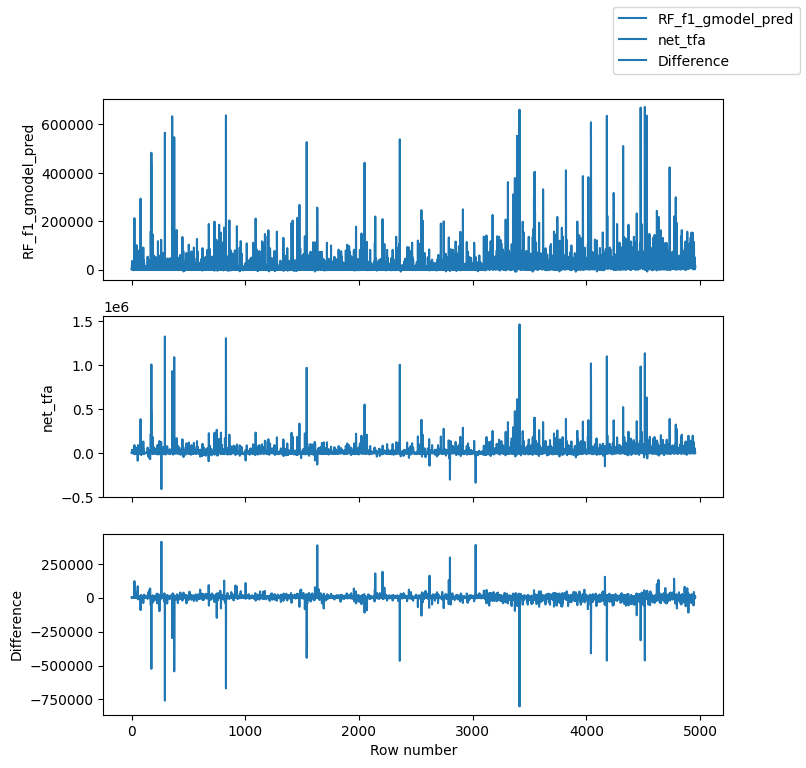

In [149]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 8))

# Plot the RF_f1_gmodel_pred column
ax1.plot(D2.index, D2['RF_f1_gmodel_pred'], label='RF_f1_gmodel_pred')
ax1.set_ylabel('RF_f1_gmodel_pred')

# Plot the net_tfa column
ax2.plot(D2.index, D2['net_tfa'], label='net_tfa')
ax2.set_ylabel('net_tfa')

# Plot the difference between the two columns
ax3.plot(D2.index, D2['RF_f1_gmodel_pred'] - D2['net_tfa'], label='Difference')
ax3.set_ylabel('Difference')
ax3.set_xlabel('Row number')

# Add a legend to the plot
fig.legend()

# Show the plot
plt.show()

In [151]:
## 4) Make predictions on the complementary dataset D2, and calculate the ATE_2 as the average of f1(D2) - f0(D2)
# Predict the outcome using the f1_1 and f1_0 models, respectively. 
# Then it computes the ATE by taking the difference of the mean predicted outcomes between the two groups. 
# define predictor functions
ATE_2 = np.mean(RF_f1_gmodel.predict(D2.drop('net_tfa', axis=1))) - np.mean(RF_f0_gmodel.predict(D2.drop('net_tfa', axis=1)))

ATE_2

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- RF_f1_gmodel_pred


In [121]:
np.mean(RF_f1_gmodel.predict(D2.drop('net_tfa', axis=1)))

c:\Users\no_mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


236296.99871320758

In [122]:
np.mean(RF_f0_gmodel.predict(D2.drop('net_tfa', axis=1)))

c:\Users\no_mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


265458.339830581

In [123]:
## 5) repeat 1-4 and switch roles between D1 and D2
D2_1 = D2[D2['e401']==1]
D2_0 = D2[D2['e401']==0]

f2_1 = RF_f1_gmodel.fit(D2_1.drop('net_tfa', axis=1), D2_1['net_tfa'])
f2_0 = RF_f0_gmodel.fit(D2_0.drop('net_tfa', axis=1), D2_0['net_tfa'])

In [124]:
## 5a) repeat 1-4 and switch roles between D1 and D2

# Start with D2. Split D2 into two: D2_1 with e401 = 1, D2_0 with e401 = 0
D2_1 = D2[D2['e401']==1]
D2_0 = D2[D2['e401']==0]
#3) Train two models, one for D2_1, and another for D2_0, f1 and f0, respectively 

## Data Prep

## make x and y
D2_0_X = D2_0.loc[:, D2_0.columns != 'net_tfa']
D2_1_X = D2_1.loc[:, D2_1.columns != 'net_tfa']

D2_0_y = D2_0['net_tfa']
D2_1_y = D2_1['net_tfa']

## split into train and test sets

D2_0_X_train, D2_0_X_test, D2_0_y_train, D2_0_y_test = train_test_split(D2_0_X, D2_0_y)

D2_1_X_train, D2_1_X_test, D2_1_y_train, D2_1_y_test = train_test_split(D2_1_X, D2_1_y)


## scale data

scaler_D2_0 = StandardScaler()
scaler_D2_0.fit(D2_0_X_train)
D2_0_X_train_scl = scaler_D2_0.transform(D2_0_X_train)
D2_0_X_test_scl = scaler_D2_0.transform(D2_0_X_test)

scaler_D2_1 = StandardScaler()
scaler_D2_1.fit(D2_0_X_train)
D2_1_X_train_scl = scaler_D2_1.transform(D2_1_X_train)
D2_1_X_test_scl = scaler_D2_1.transform(D2_1_X_test)


RF_param_grid = {
    'n_estimators':[50, 60, 70, 80, 90, 100, 110, 120, 130],
    'min_samples_leaf':[5, 7, 8, 9, 10, 11, 12, 13, 14, 15],
}

#f0
RF2_f0 = RandomForestRegressor(
    n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)

RF2_f0_gmodel = GridSearchCV(RF2_f0, param_grid=RF_param_grid, scoring='r2', cv=5)


RF2_f0_gmodel.fit(D2_0_X_train_scl, D2_0_y_train)


#f1
RF2_f1 = RandomForestRegressor(
    n_estimators=500, max_depth=7, max_features=3, min_samples_leaf=3)

RF2_f1_gmodel = GridSearchCV(RF2_f1, param_grid=RF_param_grid, scoring='r2', cv=5)

RF2_f1_gmodel.fit(D2_1_X_train_scl, D2_1_y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, max_features=3,
                                             min_samples_leaf=3,
                                             n_estimators=500),
             param_grid={'min_samples_leaf': [5, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130]},
             scoring='r2')

In [125]:
## 5b) Make predictions on the complementary dataset D2, and calculate the ATE_2 as the average of f1(D2) - f0(D2)
# Predict the outcome using the f1_1 and f1_0 models, respectively. 
# Then it computes the ATE by taking the difference of the mean predicted outcomes between the two groups. 
# define predictor functions
ATE_1 = np.mean(RF2_f1_gmodel.predict(D1.drop('net_tfa', axis=1))) - np.mean(RF2_f0_gmodel.predict(D1.drop('net_tfa', axis=1)))

ATE_1

c:\Users\no_mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\no_mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-18797.29032235779

In [126]:
## calculate the ATE = (ATE_1 + ATE_2)/2
ATE = (ATE_1 + ATE_2)/2
ATE

-23979.315719865597

In [ ]:
mean_tfa_e401_1 = data.loc[data['e401'] == 1, 'net_tfa'].mean()
mean_tfa_e401_1

30347.389

In [138]:
mean_tfa_e401_1 = data.loc[data['e401'] == 0, 'net_tfa'].mean()
mean_tfa_e401_1

10788.046

In [134]:
mean_tfa_e401_1 = D2.loc[D2['e401'] == 1, 'net_tfa'].mean()
mean_tfa_e401_1

31022.516

In [135]:
mean_tfa_e401_1 = D2.loc[D2['e401'] == 0, 'net_tfa'].mean()
mean_tfa_e401_1

11176.286

In [136]:
mean_tfa_e401_1 = D1.loc[D1['e401'] == 1, 'net_tfa'].mean()
mean_tfa_e401_1

29672.264

In [137]:
mean_tfa_e401_1 = D1.loc[D1['e401'] == 0, 'net_tfa'].mean()
mean_tfa_e401_1

10399.678

In [64]:
# Step 4-6



['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [ ]:
'''
4) Make predictions on the complementary dataset D2, and calculate the ATE_2 as the average of f1(D2) - f0(D2)
5) Repeat the process switching roles between D1 and D2, and calculate the ATE = (ATE_1 + ATE_2)/2
6) Include the previous process inside a ‘for’ loop.
'''

In [ ]:
#code

In [ ]:
#Step 7 & 8 and documentation

In [ ]:
'''
7) Pick a random sample (with replacement) of the original dataset D, which we will call D_boostrap, and calculate the ATE with the process described in the previous slide of the D_boostrap
8) Get the results for all the resamplings and calculate the mean and confidence intervals (quantiles 2.5%, 97.5%) of the ATEs.
'''

In [ ]:
#code